centers.shape (6, 1)
heights.shape (4, 1)
weights.shape (4, 1)
x.shape (4, 6)
Original inputs [[1.32]
 [1.45]
 [1.66]
 [1.88]]
RBF repr [[3.59155441e-01 8.65887748e-01 9.38005000e-01 4.56576050e-01
  9.98586094e-02 9.81346359e-03]
 [1.31993843e-01 5.35261429e-01 9.75309912e-01 7.98516219e-01
  2.93757700e-01 4.85578213e-02]
 [1.28296036e-02 1.20512717e-01 5.08647519e-01 9.64640293e-01
  8.22012235e-01 3.14742637e-01]
 [4.33334765e-04 9.81346359e-03 9.98586094e-02 4.56576050e-01
  9.38005000e-01 8.65887748e-01]]
Score on training data =  0.9996168765391629
all_x.shape (1000, 1)
expanded_x.shape (1000, 6)
all_y.shape (1000, 1)


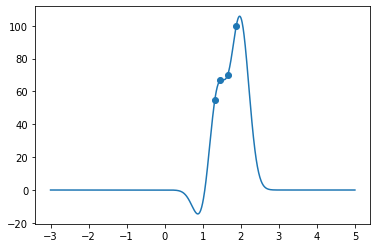

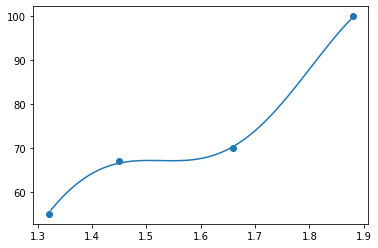

In [217]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

heights = np.asarray([1.32, 1.45, 1.66, 1.88]).reshape(-1, 1)
weights = np.asarray([55, 67, 70, 100]).reshape(-1, 1)
centers = np.asarray([1.0, 1.2, 1.4, 1.6, 1.8, 2.0]).reshape(-1, 1)
print("centers.shape", centers.shape)
print("heights.shape", heights.shape)
print("weights.shape", weights.shape)

# I recommend playing around with these parameters and seeing how well you fit
# the data.  Changing one of the parameters will change the optimal value of
# the other:
sigma = 0.1
alpha = 0.001

# New representation:
x = rbf_kernel(heights, centers, gamma=1.0/sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, weights)
print("Score on training data = ", regr.score(x, weights))
all_x = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

# New representation:
expanded_x = rbf_kernel(all_x, centers, gamma=1 / sigma)
all_y = regr.predict(expanded_x)
print("all_x.shape", all_x.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", all_y.shape)

# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_x, all_y)
plt.scatter(heights, weights)

# Zoom in and see how well predictions fit the data
zoom_ind = (all_x > heights.min()) & (all_x < heights.max())
plt.figure()
plt.plot(all_x[zoom_ind], all_y[zoom_ind])
plt.scatter(heights, weights)
plt.show()

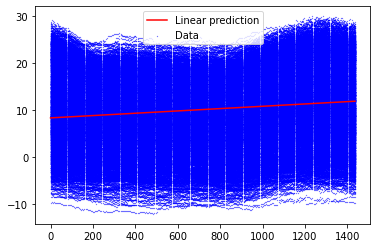

In [291]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]
usecols = [1, 2, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = data[:, 2] > -1000

x_train = data[valid, 1].reshape(-1, 1)
y_train = data[valid, 2]
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

x_predict = [[0], [1435]]
y_predict = regr.predict(x_predict)

plt.scatter(data[valid, 1], data[valid, 2], label='Data', color='b', s=0.05)
plt.plot(x_predict, y_predict, label='Linear prediction', color='r')
plt.legend(loc='best')
plt.show()

In [4]:
len(x_train)

630854

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
sigma = 1
alpha = 0.5
centers = np.asarray([i for i in range(0,1435,3)]).reshape(-1, 1)
x_new = rbf_kernel(X_train, centers, gamma=1.0/sigma)
X_train, X_test, y_train, y_test = train_test_split(x_new, y_train, test_size=0.2, random_state=42)
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(X_train, y_train)
print("Score on test data = ", regr.score(X_test, y_test))

Score on test data =  0.0427640969627735


In [269]:
all_x = np.asarray([i for i in range(0,1450, 25)]).reshape(-1,1)
x_extended = rbf_kernel(all_x, centers, gamma=1.0/sigma)
all_y = regr.predict(x_extended)
print(all_y)

[11.80844946 11.38676812 10.96345157 10.56169832 10.12428682  9.72818253
  9.36594392  9.09474082  8.93761928  8.89910986  8.87162622  8.89498794
  8.94403656  8.94094398  8.95292468  8.95409544  8.89831492  8.83473569
  8.79580394  8.73991336  8.70502905  8.66599779  8.61471997  8.58337909
  8.54982903  8.49875859  8.47352729  8.44850565  8.39801556  8.35880229
  8.32921329  8.29945863  8.30761098  8.36807304  8.50007936  8.74287371
  9.06029653  9.42685148  9.84658375 10.28770817 10.67575537 11.04059013
 11.39059155 11.6767778  11.94973078 12.19031752 12.36833545 12.54235677
 12.72702774 12.79581469 12.87282064 12.90797724 12.84411354 12.78519035
 12.68052076 12.48761004 12.28054912 12.02598776]


In [285]:
from sklearn.model_selection import cross_val_score
alphas = [0.001,0.01,0.1,1,10]
sigmas = [0.001,0.01,0.1,1,10]

#checking sigma and alpha combinations
for sigma in sigmas:
    x_cv = rbf_kernel(x_train, centers, gamma=1.0/sigma)
    for alpha in alphas:
        regr_cv = Ridge(alpha=alpha, fit_intercept=False)
        scores = cross_val_score(regr_cv, x_cv, y_train, cv=5)
        print(sigma, alpha, np.mean(scores))

0.001 0.001 -1.2485477138027943
0.001 0.01 -1.2485477615381542
0.001 0.1 -1.2485482406049129
0.001 1 -1.2485532023915726
0.001 10 -1.2486197370971477
0.01 0.001 -1.2485477138027943
0.01 0.01 -1.2485477615381542
0.01 0.1 -1.2485482406049129
0.01 1 -1.2485532023915726
0.01 10 -1.2486197370971477
0.1 0.001 -1.2398684753100855
0.1 0.01 -1.247675616849415
0.1 0.1 -1.2484609837266494
0.1 1 -1.2485444762794506
0.1 10 -1.248618864481692
1 0.001 -0.031054328551625952
1 0.01 -0.031055080584906004
1 0.1 -0.031062788610887425
1 1 -0.03115848138613886
1 10 -0.033829245898041704
10 0.001 -0.0310542528265082
10 0.01 -0.031054321448298384
10 0.1 -0.031055008859607304
10 1 -0.031062002245364796
10 10 -0.031143795759389324


Text(0, 0.5, 'Temperature')

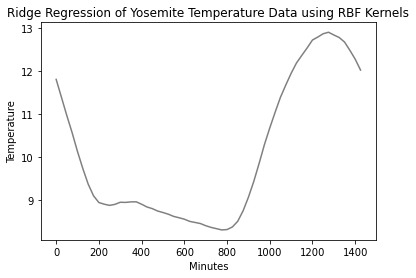

In [284]:
plt.figure()
plt.plot([i for i in range(0,1450, 25)], all_y, color="grey")
plt.title("Ridge Regression of Yosemite Temperature Data using RBF Kernels")
plt.xlabel("Minutes")
plt.ylabel("Temperature")